<a href="https://colab.research.google.com/github/kurniarahmi/Belajar-di-DQLAB/blob/main/EDA_DQLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explanatory Data Analysis**

---


<figure>
<center>
<img src='https://image.freepik.com/free-vector/cartoon-tiny-analysts-giant-research-dashboard-with-data-flat-illustration_74855-16814.jpg' />
<figcaption>Melakukan Analisis Data/Freepik.com/@pch-vector</figcaption></center>
</figure>

Explanatory Data Analysis adalah proses penyelidikan awal pada data untuk menemukan pola, pencilan/anomali, mengguji hipotesis, dan memeriksa asumsi menggunakan bantuan statistika deskriptif dan visualisasi grafis.  

Proses ini menuntut kita untuk lebih kritis terhadap data yang dimiliki. Umumnya penyelidikan ini dilakukan untuk mempermudah kita mendapatkan informasi sebanyak mungkin sebelum dilakukan analisis lebih mendalam. 

Pada tulisan ini akan dibahas mengenai Explanatory Data Analysis yang mengacu pada modul DQLAB.

Sebelum memulai memahami EDA ini, mari mengenal library yang ada di Python yang pastinya akan berguna untuk memudahkan kita dalam melakukan EDA. 
1. **Library Numpy**

  Peggunaan library 'Numpy' ditujukkan untuk melakukan proses komputasi numerik terutama dalam bentuk array multidimensional (1-Dimensi ataupun 2-Dimensi). Sementara itu, istilah 'Array' yang dimaksud adalah kumpulan dari variabel yang memiliki tipe data yang sama. Jadi, NumPy menyimpan data dalam bentuk arrays.

2. **Library Pandas**
  
  Pandas adalah library yang digunakan dalam melakukan manipulasi, cleansing maupun analisis struktur data. Terdapat lima fitur utama dalam pemrosesan dan analisis data, yaitu *load, prepare, manipulate, modelling, dan analysis data*.

  Pandas menggunakan konsep array dari NumPy namun memberikan index kepada array tersebut, sehingga disebut series ataupun data frame. Sehingga bisa dikatakan Pandas menyimpan data dalam dictionary-based NumPy arrays. 1-Dimensi labelled array dinamakan sebagai Series. Sedangkan 2-Dimensi dinamakan sebagai Data Frame.
 
3. **Library Scipy**

  Library Scipy dibangun untuk bekerja dengan array NumPy dan menyediakan banyak komputasi numerik yang ramah pengguna dan efisien seperti rutinitas untuk integrasi, diferensiasi dan optimasi numerik.

4. **Library Matpolib**

  Library dari Python yang umum digunakan untuk visualisasi data berupa:
  * Line chart
  * Bar chart
  * Pie chart
  * Box plot chart
  * Violin chart
  * Errorbar chart
  * Scatter chart





# 1. Memanggil library di Python

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
order_df

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,ec88157ad03aa203c3fdfe7bace5ab6b,1,165f86fe8b799a708a20ee4ba125c289,3077000,7ddcbb64b5bc1ef36ca8c151f6ec77df,172000,1642b8087a8ca0c8592becff7e183c98,delivered,2017-12-15,e-wallet,automotive,2425.0
49995,ed60085e92e2aa3debf49159deb34da7,1,6e835aea84ae8eb68b8c14878dd43b30,1277000,4d6d651bd7684af3fffabd5f08d12e5a,130000,431bbb57d52f3141ab2f33a6a4cf00a6,delivered,2017-12-15,debit card,beauty,2350.0
49996,ed98c37d860890f940e2acd83629fdd1,2,aca2eb7d00ea1a7b8ebd4e68314663af,486000,955fee9216a65b617aa5c0531780ce60,14000,71f8cd490677ee95362201588c0eaff4,delivered,2017-12-15,debit card,gadget,2600.0
49997,ed98c37d860890f940e2acd83629fdd1,1,aca2eb7d00ea1a7b8ebd4e68314663af,830000,955fee9216a65b617aa5c0531780ce60,108000,71f8cd490677ee95362201588c0eaff4,delivered,2017-12-15,e-wallet,gadget,2600.0


# 2. Inspeksi struktur data frame
## Melihat struktur kolom dan baris dari data frame

In [5]:
print(order_df.shape)

(49999, 12)


Artinya, terdapat 49999 baris dan 12 kolom.
Selanjutnya, akan diperlihatkan 10 baris di awal dan 10 baris di akhir menggunakan fungsi head() dan tail().

In [6]:
print(order_df.head(10))
print(order_df.tail(10))

                           order_id  ...  product_weight_gram
0  2e7a8482f6fb09756ca50c10d7bfc047  ...               1800.0
1  2e7a8482f6fb09756ca50c10d7bfc047  ...               1400.0
2  e5fa5a7210941f7d56d0208e4e071d35  ...                700.0
3  3b697a20d9e427646d92567910af6d57  ...                300.0
4  71303d7e93b399f5bcd537d124c0bcfa  ...                500.0
5  be5bc2f0da14d8071e2d45451ad119d9  ...                400.0
6  0a0837a5eee9e7a9ce2b1fa831944d27  ...               3100.0
7  1ff217aa612f6cd7c4255c9bfe931c8b  ...                200.0
8  22613579f7d11cc59c4347526fc3c79e  ...                600.0
9  356b492aba2d1a7da886e54e0b6212b7  ...                610.0

[10 rows x 12 columns]
                               order_id  ...  product_weight_gram
49989  e2abaacfbaa87cb128b9c6675bcd2b98  ...                150.0
49990  e35d5b4ff8dc9aeccf9cd8ce63c07a68  ...               1150.0
49991  e59dbfb7d81fd513f1ffa941fe849c57  ...               1064.0
49992  e821c71ba6efed0813bbc0a

## Membuat summary data sederhana dari dataset

In [42]:
# Quick summary  dari segi kuantitas, harga, freight value, dan weight
print(order_df.describe())
# Median median dan rataan dari total pembelian konsumen per transaksi kolom price
print("median adalah",(order_df.loc[:, "price"].median()))
print("rataannya adalah",round((order_df.loc[:, "price"].mean()),2))

           quantity         price  freight_value  product_weight_gram
count  49999.000000  4.999900e+04   49999.000000         49980.000000
mean       1.197484  2.607784e+06  104521.390428          2201.830892
std        0.722262  1.388312e+06   55179.844962          3929.896875
min        1.000000  2.000000e+05    9000.000000            50.000000
25%        1.000000  1.410500e+06   57000.000000           300.000000
50%        1.000000  2.610000e+06  104000.000000           800.000000
75%        1.000000  3.810000e+06  152000.000000          1850.000000
max       21.000000  5.000000e+06  200000.000000         40425.000000
median adalah 2610000.0
rataannya adalah 2607783.92


Jika diperhatikan, nilai median dan rataanya memiliki nilai yang tidak jauh berbeda. Artinya "price" termasuk ke dalam data yang baik. 

## Mengenal dan Membuat Distribusi Data dengan Histogram

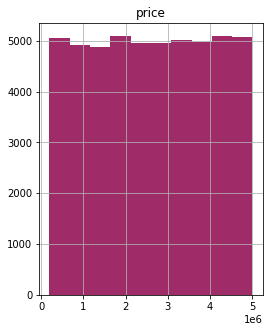

In [49]:
# plot histogram kolom: price
order_df[["price"]].hist(figsize=(4, 5), bins=10, xlabelsize=10, ylabelsize=10, facecolor='#9F2B68')
plt.show()  # Untuk menampilkan histogram plot

# 3. Standar Deviasi dan Varians pada Pandas

In [46]:
# Standar variasi kolom product_weight_gram
print("Nilai standar deviasi =",round(order_df.loc[:, "product_weight_gram"].std(),2))
# Varians kolom product_weight_gram
print("Nilai varians =", round(order_df.loc[:, "product_weight_gram"].var(),2))

Nilai standar deviasi = 3929.9
Nilai varians = 15444089.45


# 4.  Menemukan Outliers Menggunakan Pandas

Oulier/pencilan adalah nilai ekstrim yang dapat menggamggu hasil akhir. Umumnya nilai pencilan ini dapat diketahui jika memenuhi kedua syarat sebagai berikut:

* data < Q1 - 1.5 * IQR
* data > Q3 + 1.5 * IQR


In [53]:
# Hitung quartile 1
Q1 = order_df[["product_weight_gram"]].quantile(0.25)
# Hitung quartile 3
Q3 = order_df[["product_weight_gram"]].quantile(0.75)
# Hitung inter quartile range dan cetak ke console
IQR = Q3-Q1
print("Pencilan dari",IQR)

Pencilan dari product_weight_gram    1550.0
dtype: float64


#5. Rename Kolom Data Frame

In [59]:
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
order_df.columns

Index(['order_id', 'quantity', 'product_id', 'price', 'seller_id',
       'shipping_cost', 'customer_id', 'order_status', 'purchase_date',
       'payment_type', 'product_category_name', 'product_weight_gram'],
      dtype='object')

#6. groupby menggunakan Pandas

Ditujukkan untuk mencari summary dari data frame dengan menggunakan aggregate dari kolom tertentu dengan aturan sebagai berikut.

* jika fungsi aggregate adalah mean
```
df["score"].groupby([df["name"]]).mean()
```

* jika fungsi aggregate adalah sum
```
df["score"].groupby([df["name"]]).sum()
```

* dll.

In [60]:
# Hitung rata rata dari price per payment_type
rata_rata = order_df["price"].groupby(order_df["payment_type"]).mean()
print(rata_rata)

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


#7. Sorting Menggunakan Pandas

In [61]:
# Hitung harga maksimum pembelian customer
sort_harga = order_df.sort_values(by="price", ascending=True)
print(sort_harga)

                               order_id  ...  product_weight_gram
11939  64619901c45fba79638d666058bf6be6  ...                200.0
42166  54220fcc516cabe9ec84b210c0765ef2  ...               1100.0
42452  9960ee97c2f8d801a200a01893b3942f  ...               6663.0
42025  36cdcd48e9697951eef9c32ef39dc9f3  ...                550.0
33786  0d9e86e02c1a823b20c03ea29d616607  ...               7550.0
...                                 ...  ...                  ...
3976   f343624eab419250ad81f1ce6be22c93  ...                950.0
21072  c8947a583ab9791a5a9d02384cb84302  ...                550.0
41958  2711089c7fec59d4dc8483e3c6a12fa3  ...                200.0
22618  a767765cf25c6fcfd8307499da9205d2  ...                200.0
47074  f6134169ca6f0cdfbe6458ebb5731613  ...              10600.0

[49999 rows x 12 columns]


# Studi Kasus

payment_type
credit card        2587500
debit card         2621500
e-wallet           2589000
virtual account    2643000
Name: price, dtype: int64
                               order_id  ...  product_weight_gram
23829  7d63cb1d349e7bd0ee1edcc61ea71077  ...                400.0
12011  00c9f7d4b0e87781465e562dc109f6aa  ...                900.0
10984  69013d19f8db4cd7dc9f3b5c2564a96f  ...                250.0
29722  f32c4d2b078bc5a354f4c1184522b5ff  ...                450.0
15259  c8eab0ccabe8cdfc2afce66c1c554ae2  ...                100.0
...                                 ...  ...                  ...
2891   1d0e8770169496e47622b6cbc0d10bda  ...                900.0
36815  4bff82a994068f564e54b52b08ef4512  ...                150.0
8175   e6b1fa22555c3064f984ebeb8a88de77  ...                250.0
4034   8ac2728285fd4228f35d907768b5288a  ...               1700.0
32994  0286e258217733541e80588e29c208c1  ...                700.0

[49999 rows x 12 columns]
product_category_name
beauty      

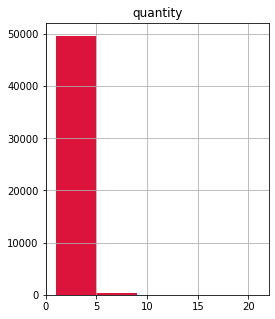

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")

# Median price yang dibayar customer dari masing-masing metode pembayaran. 
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)

# Ubah freight_value menjadi shipping_cost dan cari shipping_cost 
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
print(sort_value)

# Untuk product_category_name, berapa  rata-rata weight produk tersebut 
# dan standar deviasi mana yang terkecil dari weight tersebut, 
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value.sort_values())

# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity 
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5,facecolor= "#DC143C" )
plt.show()

# Referensi
*   Modul DQLAB [Exploratory Data Analysis with Python for Beginner](https://academy.dqlab.id/main/package/practice/163/0?pf=0)
*   [towardsdatascience.com](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

